In [10]:
import keras
import keras.backend as K
import tensorflow as tf 
import seaborn as sns
import cv2
import numpy as np 
import pandas as pd
from models import matting_net
from data_generator import *
# from metrics import * 

In [2]:
# model path for using in EDA
MODEL_PATH = "./trained_models/Strongmodels/02-0.09.h5"
IMG_PATHS = "./dataset/img_paths_with_supervisely_nosmallobject.npy"

In [3]:
img_paths = np.load(IMG_PATHS)
img_paths[:2]

array(['./dataset/selfie/testing/00001.png',
       './dataset/selfie/testing/00002.png'], dtype='<U135')

In [4]:
# test and store ious
model = matting_net((256,256,3), train=False)
model.load_weights(MODEL_PATH)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 256, 256, 3)  0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 256, 256, 8)  224         input_1[0][0]                    
__________________________________________________________________________________________________
re_lu_1 (ReLU)                  (None, 256, 256, 8)  0           conv2d_1[0][0]                   
__________________________________________________________________________________________________
separable_conv2d_1 (SeparableCo (None, 256, 256, 8)  144         re_lu_1[0][0]                    
____________________________________________________________________________________________

In [5]:
# data feeding logic
test_params = {
            'dim': (256,256),
            'batch_size': 32,
            'n_channels': 3,
            'shuffle': False,
            'augment': False,
            'train' : False,
        }

gen = DataGeneratorMatting(img_paths, **test_params)

In [6]:
# the metric
def iou_coef(y_true, y_pred, smooth=1):
    
    threshold = tf.constant(0.5, dtype=tf.float64)
    
    y_true = tf.cast(y_true > threshold, dtype=tf.float64)
    y_pred = tf.cast(y_pred > threshold, dtype=tf.float64)
    
    intersection = K.sum(K.abs(y_true * y_pred), axis=[1,2,3])
    union = K.sum(y_true,[1,2,3])+K.sum(y_pred,[1,2,3])-intersection
    iou = K.mean((intersection + smooth) / (union + smooth), axis=0)
    return iou

In [21]:
t

AttributeError: 'tuple' object has no attribute 'shape'

In [39]:
l.shape


(256, 256, 1)

In [46]:
trues_.shape, preds_.shape

(TensorShape([Dimension(1), Dimension(256), Dimension(256), Dimension(1)]),
 TensorShape([Dimension(1), Dimension(256), Dimension(256), Dimension(1)]))

In [49]:
iou_list

[0.9853123108104551,
 0.09090909090909091,
 0.09090909090909091,
 0.09090909090909091,
 0.09090909090909091,
 0.09090909090909091,
 0.09090909090909091,
 0.09090909090909091,
 0.09090909090909091,
 0.09090909090909091]

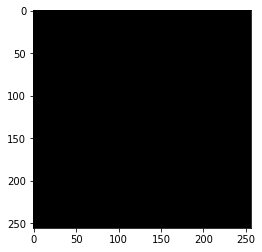

In [54]:
import matplotlib.pyplot as plt
plt.imshow(g)

In [59]:
ge[0].shape


(32, 256, 256, 3)

In [56]:
iou_list = []
for ge in gen:
    for g, l in zip(*ge):
        img = g[np.newaxis, :, :, :]
        
        preds = model.predict(img, verbose=1)
        
        trues_ = tf.constant(value=l[np.newaxis, :, :, :], dtype=tf.float64)
        preds_ = tf.constant(preds, dtype=tf.float64) 


        ious = iou_coef(trues_, preds_, smooth=1)
        with tf.Session()  as sess :
            ious_ = sess.run(ious)
            print(ious_)
            iou_list.append(ious_)
            


1/1 [==============================] - 0s 72ms/step
0.9853123108104551
1/1 [==============================] - 0s 75ms/step
0.09090909090909091
1/1 [==============================] - 0s 74ms/step
0.09090909090909091


KeyboardInterrupt: 